# Autocratische Bestuursvormen Verminderen de Persvrijheid

In [1]:
import pandas as pd

import plotly.graph_objects as go
from plotly.offline import init_notebook_mode
import plotly.express as px

init_notebook_mode(connected=True)

# Laad de dataset
eind_df = pd.read_pickle('./data/dataset.pkl')

## Argument 1

**Landen met een meer autocratische bestuursvorm hebben een lagere persvrijheid.**

Het verschil tussen democratische en autocratische bestuursvormen benadrukken is essentieel voor het begrijpen van de impact op persvrijheid. Democratische systemen kenmerken zich door politieke pluraliteit, burgerlijke vrijheden en transparantie, waarbij de pers een cruciale rol speelt in controle en openbaar debat. Autocratische regimes daarentegen concentreren de macht, beperken politieke vrijheden en onderdrukken oppositie en vrije media. Deze regimes gebruiken censuur, arrestaties van journalisten en controle over mediakanalen om kritiek te onderdrukken en de informatiestroom en publieke opinie te manipuleren.

In figuur 4 wordt een pie chart gepresenteerd die de verandering in de democratie rangschikking tussen 2019 en 2023 weergeeft. Hieruit blijkt dat 51.1% van de landen (groen) een verbetering in rang heeft ervaren, wat betekent dat ze democratischer zijn geworden. Daarentegen is 10.1% van de landen (blauw) gelijk gebleven, terwijl 38.8% van de landen (rood) een verslechtering heeft ondergaan, wat wijst op toenemende autocratische ontwikkelingen.

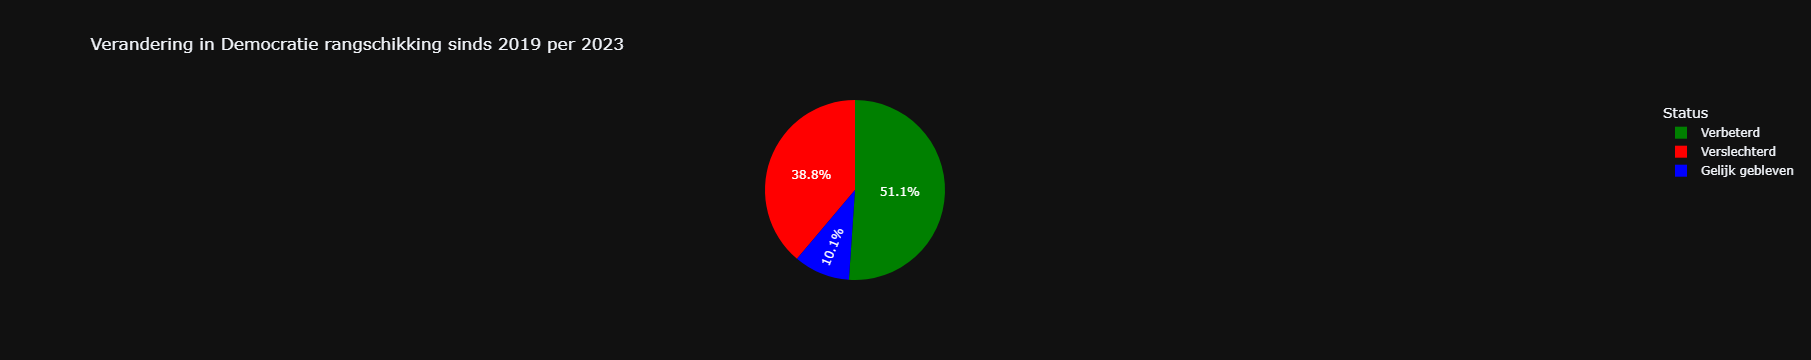

Figuur 4


In [2]:
# Creëer een pie chart van de verandering van de democratie rangen

status_counts = pd.Series(['Verslechterd' if x < 0 else 'Verbeterd' if x > 0 else 'Gelijk gebleven' for x in eind_df['democratie_verandering']]).value_counts()


fig_status = go.Figure(data=[go.Pie(
    labels=status_counts.index,
    values=status_counts.values,
    marker=dict(colors=['green', 'red', 'blue'])
)])

fig_status.update_layout(
    title='Verandering in Democratie rangschikking sinds 2019 per 2023',
    legend_title='Status'
)

fig_status.show()

print('Figuur 4')

Figuur 5 toont een wereldkaart die de gecombineerde veranderingen in de democratie rang en persvrijheid rang tussen 2019 en 2023 weergeeft. De kaart maakt gebruik van verschillende kleuren om deze veranderingen te illustreren. Oranje gebieden geven aan waar de persvrijheid is verbeterd, terwijl de democratie rang is verslechterd. Gele gebieden duiden op een verslechtering van de persvrijheid en een verbetering van de democratie rang. Rode gebieden wijzen op een verslechtering van zowel persvrijheid als democratie. Groene gebieden geven een verbetering aan zowel persvrijheid als democratie. Blauwe gebieden zijn neutraal gebleven, zonder significante veranderingen in persvrijheid of democratie.

In [3]:
# Creëer een wereldkaart om de verschillen tussen de veranderingen van persvrijheid en democratie te laten zien

# Definieer kleuren op basis van categorieën
def get_color(verandering_pers, verandering_dem):
    if verandering_pers == 0 and verandering_dem == 0:
        return 0  # Blauw: beide veranderingen zijn 0
    elif (verandering_pers >= 0 and verandering_dem > 0) or (verandering_pers > 0 and verandering_dem >= 0):
        return 1  # Groen: beide veranderingen zijn positief
    elif verandering_pers < 0 and verandering_dem < 0:
        return 2  # Rood: beide veranderingen zijn negatief
    elif verandering_pers < 0 and verandering_dem >= 0:
        return 3  # Geel: persvrijheid is negatief, democratie is positief
    elif verandering_pers >= 0 and verandering_dem < 0:
        return 4  # Oranje: persvrijheid is positief, democratie is negatief

# Voeg kleur toe aan DataFrame
eind_df['color'] = eind_df.apply(lambda row: get_color(row['persvrijheid_verandering'], row['democratie_verandering']), axis=1)
 
# Maak een lijst met kleuren op basis van categorie
colorscale = [
    'blue',    # Blauw: beide veranderingen zijn 0
    '#90ee90', # Groen: beide veranderingen zijn positief
    'red',     # Rood: beide veranderingen zijn negatief
    'yellow',  # Geel: persvrijheid is negatief, democratie is positief
    'orange',  # Oranje: persvrijheid is positief, democratie is negatief
]
 
# Creëer de choropletenkaart
data = go.Choropleth(
    locations=eind_df['land'],
    locationmode='country names',
    z=eind_df['color'],  # Gebruik de 'color' kolom als numerieke waarde voor de kleuren
    hoverinfo='location+text',  # Toon locatie, kleurwaarde en tekst bij hover    
    text=eind_df.apply(lambda row: f'Persvrijheid: {row["persvrijheid_verandering"]}<br>Democratie: {row["democratie_verandering"]}', axis=1),
    marker_line_color='gray',  # Voeg een rand toe aan de markeringen
    colorscale=colorscale,
    showscale=False,  # Zet showscale uit om geen kleurenschaal te tonen
)
 
# Creëer de opmaak
layout = go.Layout(
    width=900,
    height=600,
    title='Verandering in Persvrijheid en Democratische Rang (2019-2023)',
    geo=dict(
        showocean=True,
        oceancolor='#a8d5f2',
        showcountries=True,
        countrycolor='white',
        landcolor='white',
        showland=True,
        projection_type='mercator'
    ),
    margin={'t': 50, 'r': 90, 'b': 50, 'l': 40},
)
 
# Voeg de legenda handmatig toe als annotaties
legend_items = {
    'Pers en Demo neutraal': 0,
    'Pers en Demo positief': 1,
    'Pers en Demo negatief': 2,
    'Pers negatief Demo positief': 3,
    'Pers positief Demo negatief': 4,
}
 
annotations = []
for label, color_index in legend_items.items():
    annotations.append(dict(
        x=0.93,
        y=0.95 - (len(colorscale) - color_index - 1) * 0.05,
        xref='paper',
        yref='paper',
        text=label,
        showarrow=False,
        font=dict(size=10),
        align='left',
        xanchor='left',
    ))

# Voeg de legenda bolletjes toe
for color_index, color_value in enumerate(colorscale):
    annotations.append(dict(
        x=0.92,
        y=0.95 - (len(colorscale) - color_index - 1) * 0.05,
        xref='paper',
        yref='paper',
        text = '',
        showarrow=False,
        bgcolor=colorscale[color_index],
        width=13,
        height=13,
        borderpad=0,
    ))

layout['annotations'] = annotations
 
# Maak de figuur
fig = go.Figure(data=[data], layout=layout)
 
# Toon de figuur
fig.show()

print('Figuur 5')

Figuur 5


In figuur 5 zijn veel kleuren te zien, maar we focussen ons vooral op de rode en oranje landen. Deze landen zijn van 2019 tot 2023 meer geneigd naar een autocratische bestuursvorm. Hoewel sommige van deze landen slechts een lage verschuiving hebben van -15 of minder in hun democratie rang, lijkt dit misschien niet significant. Het is echter logisch dat een land niet zomaar van democratisch naar autocratisch verschuift, waardoor een verplaatsing van bijvoorbeeld 100 rangen heel onwaarschijnlijk is.

De rode landen hebben een duidelijke daling in persvrijheid meegemaakt, terwijl de oranje landen over het algemeen slechts kleine stijgingen in persvrijheid hebben laten zien. Deze wereldkaart toont een subtiele relatie tussen de afname van democratische normen en de verslechtering van persvrijheid, waarbij opvalt dat sommige autocratische landen (oranje) ondanks een meer autocratisch bestuur toch een kleine verbetering in persvrijheid laten zien.

Figuur 6 is een scatterplot die de relatie toont tussen de democratie rangschikking 2023 en de persvrijheid rangschikking 2023. Deze grafiek biedt een visuele representatie van de dynamiek tussen bestuursvorm en persvrijheid. Een lagere score op de democratie rangschikking duidt op een meer democratische bestuursvorm, terwijl een hogere score wijst op een meer autocratische bestuursvorm. Voor de persvrijheids rangschikking geldt dat een lage score gelijk staat aan meer persvrijheid, terwijl een hoge score minder persvrijheid betekent.

In [4]:
# creeer een scatterplot om de relatie tussen de democratie en persvrijheid aan te geven per land

fig = px.scatter(
    eind_df,
    x='democratie_rang_2023',
    y='persvrijheid_rang_2023',
    title = 'Democracy vs Persvrijheid rangschikking 2023 ',
    hover_data=['land'],
    trendline="ols")

fig.update_layout(
    xaxis_title="Democratie rangschikking 2023",
    yaxis_title="Persvrijheid rangschikking 2023"
)

for trace in fig.data:
    if trace.mode == "lines":
        trace.line.color = "black"

fig.show()

print('Figuur 6')

correlation = eind_df["democratie_rang_2023"].corr(eind_df["persvrijheid_rang_2023"])
print(f"Correlatie tussen de democratie rangschikking en de persvrijheid rangschikking: {correlation}")

Figuur 6
Correlatie tussen de democratie rangschikking en de persvrijheid rangschikking: 0.7537908881085531


In figuur 6 te zien dat naarmate de democratische normen afnemen en een land autocratischer wordt, de persvrijheids rangschikking stijgt, wat neerkomt op minder persvrijheid. Deze scatterplot toont een sterke correlatie van ongeveer 0.75, wat een duidelijk verband aantoont tussen de bestuursvorm en de persvrijheid.

## Argument 2

**Landen met een meer autocratische bestuursvorm hebben vaker conflicten.**

Autocratische bestuursvormen concentreren de macht in handen van een enkele leider of een kleine groep, met beperkte politieke vrijheden en burgerrechten. In deze systemen worden dissidente stemmen vaak onderdrukt en media gecontroleerd. Intern kunnen autocratische regimes geweld en repressie gebruiken om oppositie te onderdrukken, wat kan leiden tot opstanden en burgeroorlogen. Daarnaast kunnen ze militaire agressie inzetten om hun macht te versterken en territoriale ambities na te streven. Deze focus op controle en macht maakt autocratische regimes vaak geneigd om conflicten te escaleren, wat zowel nationaal als internationaal verstrekkende gevolgen heeft. Begrip van deze dynamiek is essentieel voor het bevorderen van vrede en stabiliteit.

Figuur 7 toont een scatterplot van de democratie rangschikking versus de conflict rangschikking in 2023. In deze grafiek zien we een lichte correlatie tussen de mate van democratie en het aantal conflicten in een land. Een hogere democratie rang betekent een meer autocratische bestuursvorm. Bij de conflict rangschikking betekent een hogere rang minder conflicten en een lagere rang dus meer conflicten.


In [5]:
# creeer een scatterplot om de relatie tussen de democratie en conflict aan te geven per land

fig = px.scatter(
    eind_df,
    x='democratie_rang_2023',
    y='conflict_rang_2023',
    title = 'Democratie rangschikking vs Conflict rangschikking 2023',
    hover_data=['land'],
    trendline="ols",
)

fig.update_layout(
    xaxis_title="Democratie rangschikking 2023",
    yaxis_title="Conflict rangschikking 2023"
)

for trace in fig.data:
    if trace.mode == "lines":
        trace.line.color = "black"


fig.show()

print('Figuur 7')

correlation = eind_df["democratie_rang_2023"].corr(eind_df["conflict_rang_2023"])
print(f"Correlatie tussen de democratie rangschikking en de conflict rangschikking: {correlation}")

Figuur 7
Correlatie tussen de democratie rangschikking en de conflict rangschikking: 0.42203916592217416


De scatterplot laat zien dat autocratische landen zich vaak lager op de conflict rangschikking bevinden, wat betekent dat deze landen doorgaans meer conflicten ervaren. Dit patroon suggereert dat autocratische regimes mogelijk een grotere neiging hebben tot interne en externe conflicten, waarschijnlijk door hun repressieve en ondoorzichtige bestuur.

Hoewel de correlatie niet extreem sterk is, biedt deze scatterplot toch waardevolle inzichten in hoe de bestuursvorm van een land kan samenhangen met zijn neiging tot conflicten. Autocratische regimes lijken vaker betrokken te zijn bij conflicten, wat mogelijk te wijten is aan factoren zoals gebrek aan politieke participatie, onderdrukking van oppositie en beperkingen op burgerlijke vrijheden.